# Code for the analysis of data file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Reading CSV file excluding 2015 data, converting to DateTime format, and extracting date, month, time and hours

In [2]:
 data = pd.read_csv("ELEC_ROOMS.csv",parse_dates=[['Date', 'Time']])
# data = pd.read_csv("Desktop/Europa_EAU/EAU_Rooms2.csv")
for i in range(1,143):
    data = data.ix[(data['R'+str(i)] >= 0)]
    
data['Total']= data['R1']
for i in range(2,143):
    data['Total']= data['Total']+data['R'+str(i)]
    
# data['Date_Time']= pd.to_datetime(data['Date_Time']) 
# data['date'] = pd.DatetimeIndex(data['Date_Time']).date
# data['month'] = pd.DatetimeIndex(data['Date_Time']).month



C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [3]:
data['Date_Time']= pd.to_datetime(data['Date_Time']) 
data['date'] = pd.DatetimeIndex(data['Date_Time']).date
data['month'] = pd.DatetimeIndex(data['Date_Time']).month



In [4]:
data['year'] = pd.DatetimeIndex(data['Date_Time']).year


In [5]:
data['hour'] = pd.DatetimeIndex(data['Date_Time']).hour

In [6]:
data

,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R138,R139,R140,R141,R142,Total,date,month,year,hour
0,2016-01-01 00:58:28,483.2,2304.24,0.00,68.91,163.53,155.03,771.37,268.66,0.00,...,230.68,0.46,54.09,108.62,216.07,828101.55,2016-01-01,1,2016,0
1,2016-01-01 00:55:28,483.2,2304.24,0.00,68.91,163.53,155.03,771.37,268.66,0.00,...,230.68,0.46,54.09,108.52,216.07,238274.32,2016-01-01,1,2016,0
2,2016-01-01 00:52:28,483.1,2304.24,0.00,68.91,163.53,155.03,771.37,268.66,0.00,...,230.68,0.46,54.09,108.52,216.07,500414.51,2016-01-01,1,2016,0
3,2016-01-01 00:49:28,483.1,2304.24,0.00,68.91,163.53,155.03,771.37,268.66,0.00,...,230.68,0.46,54.09,108.52,216.07,565947.16,2016-01-01,1,2016,0
4,2016-01-01 00:46:28,483.1,2304.14,0.00,68.91,163.53,155.03,771.37,268.66,0.00,...,230.68,0.46,54.09,108.52,216.07,303799.44,2016-01-01,1,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650839,2019-09-20 12:12:48,5894.6,12504.44,14186.39,27337.00,9547.01,3091.95,15749.36,7596.54,22361.32,...,5985.71,21208.60,15069.93,18945.30,4832.32,4998622.35,2019-09-20,9,2019,12
650840,2019-09-20 12:09:48,5894.6,12504.44,14186.39,27337.00,9547.01,3091.95,15749.26,7596.54,22361.21,...,5985.71,21208.60,15069.82,18945.30,4832.32,4998614.23,2019-09-20,9,2019,12
650841,2019-09-20 12:06:48,5894.6,12504.34,14186.28,27336.89,9547.01,3091.95,15749.26,7596.54,22361.21,...,5985.71,21208.49,15069.82,18945.20,4832.32,4998603.93,2019-09-20,9,2019,12
650842,2019-09-20 12:03:48,5894.6,12504.34,14186.28,27336.89,9547.01,3091.95,15749.15,7596.43,22361.11,...,5985.71,21208.49,15069.72,18945.20,4832.32,4998594.89,2019-09-20,9,2019,12


In [7]:
data=data.sort_values(by=['Date_Time'])

In [8]:
data = data.reset_index()
data

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R138,R139,R140,R141,R142,Total,date,month,year,hour
0,19,2016-01-01 00:01:27,482.69,2303.82,0.00,68.91,163.43,155.03,771.26,268.66,...,230.68,0.46,54.09,108.41,215.96,369283.74,2016-01-01,1,2016,0
1,18,2016-01-01 00:04:27,482.69,2303.82,0.00,68.91,163.43,155.03,771.26,268.66,...,230.68,0.46,54.09,108.41,215.96,303751.80,2016-01-01,1,2016,0
2,17,2016-01-01 00:07:27,482.69,2303.82,0.00,68.91,163.43,155.03,771.26,268.66,...,230.68,0.46,54.09,108.41,215.96,631434.98,2016-01-01,1,2016,0
3,16,2016-01-01 00:10:27,482.69,2303.93,0.00,68.91,163.43,155.03,771.26,268.66,...,230.68,0.46,54.09,108.41,215.96,303758.54,2016-01-01,1,2016,0
4,15,2016-01-01 00:13:27,482.79,2303.93,0.00,68.91,163.43,155.03,771.26,268.66,...,230.68,0.46,54.09,108.41,215.96,238226.05,2016-01-01,1,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643579,647215,2019-12-09 23:47:47,5866.77,12464.84,14120.16,27228.82,9491.16,3076.71,15669.57,7557.68,...,5958.43,21091.75,14997.68,18841.89,4806.81,4975381.43,2019-12-09,12,2019,23
643580,647214,2019-12-09 23:50:47,5866.77,12464.84,14120.16,27228.82,9491.16,3076.71,15669.57,7557.68,...,5958.43,21091.75,14997.78,18841.89,4806.81,4975385.48,2019-12-09,12,2019,23
643581,647213,2019-12-09 23:53:47,5866.77,12464.84,14120.16,27228.93,9491.16,3076.71,15669.57,7557.68,...,5958.43,21091.75,14997.78,18842.00,4806.81,4975389.84,2019-12-09,12,2019,23
643582,647212,2019-12-09 23:56:47,5866.77,12464.84,14120.16,27228.93,9491.16,3076.71,15669.57,7557.68,...,5958.43,21091.75,14997.78,18842.00,4806.81,4975393.42,2019-12-09,12,2019,23


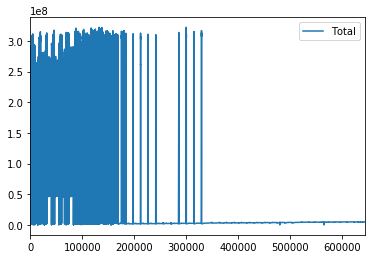

In [9]:
data.plot(y='Total')

In [10]:
data['Index'] = data.index/1000
x = data['Index']
data

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R139,R140,R141,R142,Total,date,month,year,hour,Index
0,19,2016-01-01 00:01:27,482.69,2303.82,0.00,68.91,163.43,155.03,771.26,268.66,...,0.46,54.09,108.41,215.96,369283.74,2016-01-01,1,2016,0,0.000
1,18,2016-01-01 00:04:27,482.69,2303.82,0.00,68.91,163.43,155.03,771.26,268.66,...,0.46,54.09,108.41,215.96,303751.80,2016-01-01,1,2016,0,0.001
2,17,2016-01-01 00:07:27,482.69,2303.82,0.00,68.91,163.43,155.03,771.26,268.66,...,0.46,54.09,108.41,215.96,631434.98,2016-01-01,1,2016,0,0.002
3,16,2016-01-01 00:10:27,482.69,2303.93,0.00,68.91,163.43,155.03,771.26,268.66,...,0.46,54.09,108.41,215.96,303758.54,2016-01-01,1,2016,0,0.003
4,15,2016-01-01 00:13:27,482.79,2303.93,0.00,68.91,163.43,155.03,771.26,268.66,...,0.46,54.09,108.41,215.96,238226.05,2016-01-01,1,2016,0,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643579,647215,2019-12-09 23:47:47,5866.77,12464.84,14120.16,27228.82,9491.16,3076.71,15669.57,7557.68,...,21091.75,14997.68,18841.89,4806.81,4975381.43,2019-12-09,12,2019,23,643.579
643580,647214,2019-12-09 23:50:47,5866.77,12464.84,14120.16,27228.82,9491.16,3076.71,15669.57,7557.68,...,21091.75,14997.78,18841.89,4806.81,4975385.48,2019-12-09,12,2019,23,643.580
643581,647213,2019-12-09 23:53:47,5866.77,12464.84,14120.16,27228.93,9491.16,3076.71,15669.57,7557.68,...,21091.75,14997.78,18842.00,4806.81,4975389.84,2019-12-09,12,2019,23,643.581
643582,647212,2019-12-09 23:56:47,5866.77,12464.84,14120.16,27228.93,9491.16,3076.71,15669.57,7557.68,...,21091.75,14997.78,18842.00,4806.81,4975393.42,2019-12-09,12,2019,23,643.582


In [11]:
from sklearn import datasets
import statsmodels.api as sm

y1 = data['Total']
model  = sm.OLS(y1,x).fit()
pred = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Total   R-squared (uncentered):                   0.016
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                          1.019e+04
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                        0.00
Time:                        15:49:35   Log-Likelihood:                     -1.2772e+07
No. Observations:              643584   AIC:                                  2.554e+07
Df Residuals:                  643583   BIC:                                  2.554e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Index       3.405e+04    337.372    100.930      0.000    3.34e+04    3.47e+04
==============================================================================
Omnibus:                   251128.023   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           732229.517
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                       5.937   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

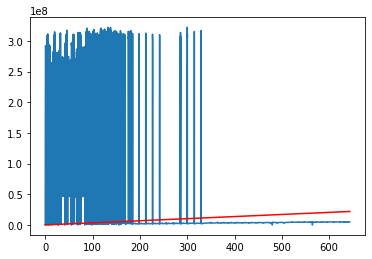

In [12]:
plt.plot(x,y1)
plt.plot(x,pred,color='red')
plt.show()

In [13]:
# data['Date'] = pd.DatetimeIndex(data['Date'])

# data2: data grouped by month of the year

In [14]:
data2= data.groupby(['year','month']).sum()

In [15]:
data6= data.groupby(['date']).sum()

In [16]:
data6 = data6.reset_index()


In [17]:
data6

,date,index,R1,R2,R3,R4,R5,R6,R7,R8,...,R138,R139,R140,R141,R142,Total,month,year,hour,Index
0,2016-01-01,114960,235033.39,1109284.37,0.00,33076.80,80227.84,74870.07,370422.86,130199.12,...,111537.56,220.80,25963.20,53433.01,104464.97,7.711878e+10,480,967680,5520,114.960
1,2016-01-02,7091336,328933.71,1385682.58,121070.37,265636.00,220989.25,110333.55,541261.36,201283.21,...,173502.05,145492.67,149179.83,239043.58,151104.99,7.342029e+10,471,949536,5426,336.765
2,2016-01-03,12985360,392645.82,1502100.22,347058.41,1698754.26,366688.73,132975.80,719261.49,259526.33,...,226198.98,411102.19,314377.75,403201.41,186688.23,8.278434e+10,448,903168,5482,526.176
3,2016-01-04,19191025,441425.99,1585724.10,577101.83,3560223.68,516798.28,158401.18,867942.34,333172.89,...,287076.57,682084.26,475518.37,587692.23,226846.31,7.665978e+10,438,883008,5314,708.465
4,2016-01-05,27934320,531865.57,1927697.64,814847.15,5401632.35,707384.54,202734.55,1101137.32,444249.73,...,381983.88,1032825.24,733806.76,868559.95,294863.62,2.457744e+10,480,967680,5520,996.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,2019-12-05,281706606,2628267.41,5531061.63,6231865.97,12241351.00,4175340.03,1353203.97,7007024.23,3298744.16,...,2626640.25,9279975.15,6651185.71,8216015.93,2105684.16,2.215895e+09,5748,967101,5518,307243.533
1353,2019-12-06,288824067,2678607.93,5607413.65,6373716.39,12450584.63,4278726.00,1383434.43,7132783.27,3375409.03,...,2677730.69,9495820.34,6792563.44,8419635.11,2154307.52,2.261850e+09,5748,967101,5518,307472.974
1354,2019-12-07,295675204,2728128.39,5733932.15,6505208.17,12653756.54,4367480.89,1412553.10,7258533.32,3460067.36,...,2735235.73,9716494.79,6935124.11,8616951.91,2201510.74,2.313580e+09,5748,967101,5505,307702.415
1355,2019-12-08,302792186,2770417.36,5814868.47,6645082.07,12847866.32,4452142.94,1443096.27,7369977.75,3547178.33,...,2802220.13,9907656.35,7063562.62,8819707.72,2251571.83,2.365902e+09,5748,967101,5518,307931.856


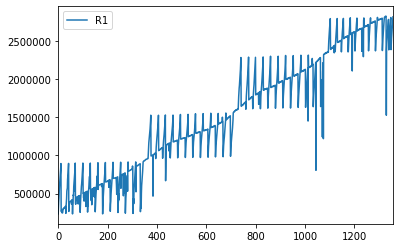

In [32]:
data6.plot(y='R1')

In [19]:
data6['Index'] = data6.index
x6 = data6['Index']



In [20]:
data6

,date,index,R1,R2,R3,R4,R5,R6,R7,R8,...,R138,R139,R140,R141,R142,Total,month,year,hour,Index
0,2016-01-01,114960,235033.39,1109284.37,0.00,33076.80,80227.84,74870.07,370422.86,130199.12,...,111537.56,220.80,25963.20,53433.01,104464.97,7.711878e+10,480,967680,5520,0
1,2016-01-02,7091336,328933.71,1385682.58,121070.37,265636.00,220989.25,110333.55,541261.36,201283.21,...,173502.05,145492.67,149179.83,239043.58,151104.99,7.342029e+10,471,949536,5426,1
2,2016-01-03,12985360,392645.82,1502100.22,347058.41,1698754.26,366688.73,132975.80,719261.49,259526.33,...,226198.98,411102.19,314377.75,403201.41,186688.23,8.278434e+10,448,903168,5482,2
3,2016-01-04,19191025,441425.99,1585724.10,577101.83,3560223.68,516798.28,158401.18,867942.34,333172.89,...,287076.57,682084.26,475518.37,587692.23,226846.31,7.665978e+10,438,883008,5314,3
4,2016-01-05,27934320,531865.57,1927697.64,814847.15,5401632.35,707384.54,202734.55,1101137.32,444249.73,...,381983.88,1032825.24,733806.76,868559.95,294863.62,2.457744e+10,480,967680,5520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,2019-12-05,281706606,2628267.41,5531061.63,6231865.97,12241351.00,4175340.03,1353203.97,7007024.23,3298744.16,...,2626640.25,9279975.15,6651185.71,8216015.93,2105684.16,2.215895e+09,5748,967101,5518,1352
1353,2019-12-06,288824067,2678607.93,5607413.65,6373716.39,12450584.63,4278726.00,1383434.43,7132783.27,3375409.03,...,2677730.69,9495820.34,6792563.44,8419635.11,2154307.52,2.261850e+09,5748,967101,5518,1353
1354,2019-12-07,295675204,2728128.39,5733932.15,6505208.17,12653756.54,4367480.89,1412553.10,7258533.32,3460067.36,...,2735235.73,9716494.79,6935124.11,8616951.91,2201510.74,2.313580e+09,5748,967101,5505,1354
1355,2019-12-08,302792186,2770417.36,5814868.47,6645082.07,12847866.32,4452142.94,1443096.27,7369977.75,3547178.33,...,2802220.13,9907656.35,7063562.62,8819707.72,2251571.83,2.365902e+09,5748,967101,5518,1355


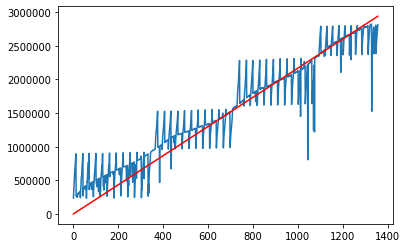

In [33]:
y6 = data6['R1']
model6  = sm.OLS(y6,x6).fit()
pred6 = model6.predict(x6)

plt.plot(x6,y6)
plt.plot(x6,pred6,color='red')
plt.show()

In [22]:
data2 = data2.iloc[0:44]

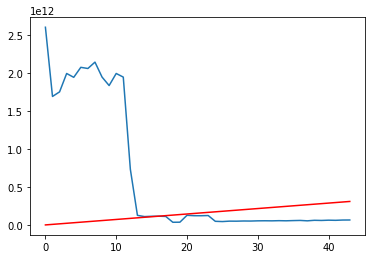

In [23]:
data2 = data2.reset_index()
data2['Index'] = data2.index
x2 = data2['Index']
y2 = data2['Total']
model2  = sm.OLS(y2,x2).fit()
pred2 = model2.predict(x2)

plt.plot(x2,y2)
plt.plot(x2,pred2,color='red')
plt.show()

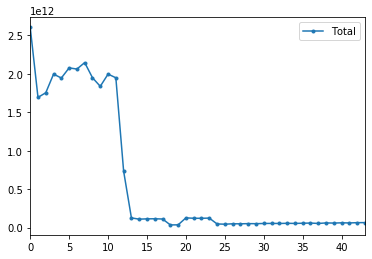

In [24]:
data2.plot(y='Total', style='.-')

# data3: get faulty 0 values in the data field

In [25]:
data3 = data.ix[(data['Total'] <= 25)]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [26]:
data3

,index,Date_Time,R1,R2,R3,R4,R5,R6,R7,R8,...,R139,R140,R141,R142,Total,date,month,year,hour,Index
8552,8817,2016-01-19 09:58:11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,9,8.552
8553,8834,2016-01-19 10:01:11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.553
8554,8833,2016-01-19 10:04:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.554
8555,8832,2016-01-19 10:07:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.555
8556,8831,2016-01-19 10:10:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.556
8557,8830,2016-01-19 10:13:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.557
8558,8829,2016-01-19 10:16:12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.558
8559,8828,2016-01-19 10:24:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.559
8560,8827,2016-01-19 10:48:22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.560
8561,8826,2016-01-19 10:51:22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2016-01-19,1,2016,10,8.561


In [27]:
data['date']= pd.to_datetime(data['date']) 

In [28]:
data.describe()

,index,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R138,R139,R140,R141,R142,Total,month,year,hour,Index
count,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,...,643584.000000,643584.000000,643584.000000,643584.000000,643584.000000,6.435840e+05,643584.000000,643584.000000,643584.000000,643584.000000
mean,327847.770342,3249.827734,7921.462643,7393.350279,17742.856722,5160.752036,1646.519517,8535.892724,3970.431624,11267.397074,...,3300.770102,11500.682730,8136.399309,9655.861697,2536.984391,4.209020e+07,6.329354,2017.397594,11.503728,321.791500
std,187016.993417,1544.371185,2663.096179,3890.194469,6162.262441,2608.863475,847.497349,4284.718705,2104.265541,6121.597295,...,1669.934964,6049.513747,4403.547806,5422.207348,1339.618564,9.220757e+07,3.391049,1.075415,6.925332,185.786842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,2016.000000,0.000000,0.000000
25%,166942.750000,1925.450000,5861.790000,4126.560000,13742.560000,2855.190000,905.860000,4751.080000,2192.100000,6511.020000,...,1837.660000,6587.330000,4256.870000,4983.425000,1368.290000,2.739810e+06,3.000000,2016.000000,5.000000,160.895750
50%,328486.500000,3072.760000,7898.630000,7375.990000,17991.695000,5416.390000,1642.510000,8791.090000,3965.790000,11580.120000,...,3442.800000,12123.470000,8535.165000,9725.050000,2531.350000,3.718260e+06,6.000000,2017.000000,12.000000,321.791500
75%,489382.250000,4499.810000,10244.140000,10332.890000,22668.960000,7292.270000,2372.070000,11869.390000,5848.560000,16091.590000,...,4778.450000,16616.390000,12070.990000,14333.097500,3701.440000,4.828165e+06,9.000000,2018.000000,18.000000,482.687250
max,650843.000000,5894.810000,12504.860000,14187.020000,27337.640000,9547.110000,3092.050000,15749.990000,7596.850000,22362.390000,...,5986.020000,21209.680000,15070.770000,18945.630000,4832.420000,3.222436e+08,12.000000,2019.000000,23.000000,643.583000


# data5: data grouped into hours 

In [29]:
data5= data.groupby(['hour']).sum()

In [30]:
data5

,index,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R137,R138,R139,R140,R141,R142,Total,month,year,Index
hour,,,,,,,,,,,,,,,,,,,,,
0,8814828435,8.740314e+07,2.130915e+08,1.988350e+08,4.773239e+08,1.387780e+08,4.427734e+07,2.295385e+08,1.067755e+08,3.030323e+08,...,2.708882e+08,8.876507e+07,3.093046e+08,2.187912e+08,2.596451e+08,6.822262e+07,3.395404e+11,170595,54298225,8653011.347
1,8732222080,8.658818e+07,2.111027e+08,1.969594e+08,4.728738e+08,1.374606e+08,4.386146e+07,2.273562e+08,1.057772e+08,3.001872e+08,...,2.683038e+08,8.791167e+07,3.063135e+08,2.166895e+08,2.572031e+08,6.758347e+07,3.359691e+11,169142,53793855,8570973.225
2,8702653089,8.633318e+07,2.107865e+08,1.963748e+08,4.723401e+08,1.370990e+08,4.373248e+07,2.267171e+08,1.054409e+08,2.992453e+08,...,2.675161e+08,8.768880e+07,3.055474e+08,2.161013e+08,2.563634e+08,6.737519e+07,3.462246e+11,169368,53846059,8539076.692
3,8822833591,8.745491e+07,2.131866e+08,1.990002e+08,4.776288e+08,1.388843e+08,4.431234e+07,2.296877e+08,1.068493e+08,3.032809e+08,...,2.710641e+08,8.882382e+07,3.095527e+08,2.189691e+08,2.598741e+08,6.827800e+07,3.806604e+11,170273,54284146,8656000.717
4,8817449021,8.738605e+07,2.129838e+08,1.988578e+08,4.771168e+08,1.387857e+08,4.428259e+07,2.295225e+08,1.067749e+08,3.030744e+08,...,2.708728e+08,8.876054e+07,3.093456e+08,2.188252e+08,2.597129e+08,6.823322e+07,3.949426e+11,170146,54215590,8652714.520
5,8814640037,8.736162e+07,2.129157e+08,1.987736e+08,4.767432e+08,1.387388e+08,4.427037e+07,2.294525e+08,1.067364e+08,3.029485e+08,...,2.707958e+08,8.872893e+07,3.092206e+08,2.187422e+08,2.596279e+08,6.821406e+07,1.082180e+12,169980,54213574,8650861.870
6,8810362559,8.733962e+07,2.129268e+08,1.987017e+08,4.767278e+08,1.386906e+08,4.425487e+07,2.293841e+08,1.066888e+08,3.028282e+08,...,2.706914e+08,8.869335e+07,3.090881e+08,2.186345e+08,2.595061e+08,6.818777e+07,1.454061e+12,169884,54259917,8645348.324
7,8806857667,8.728245e+07,2.127312e+08,1.986039e+08,4.762990e+08,1.386212e+08,4.423222e+07,2.292631e+08,1.066345e+08,3.026855e+08,...,2.705467e+08,8.864744e+07,3.089398e+08,2.185371e+08,2.593992e+08,6.815430e+07,1.584451e+12,169662,54169199,8643447.147
8,8776467299,8.699397e+07,2.120973e+08,1.979298e+08,4.749290e+08,1.381689e+08,4.408472e+07,2.285095e+08,1.062751e+08,3.016367e+08,...,2.696493e+08,8.836126e+07,3.079182e+08,2.178127e+08,2.585117e+08,6.792518e+07,1.623892e+12,169477,54042050,8617820.833


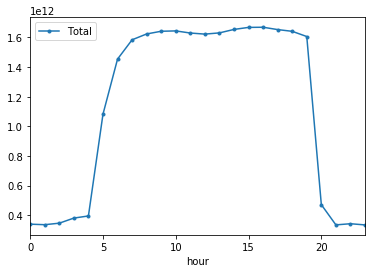

In [31]:
data5.plot(y='Total', style='.-')